### Build the image classification model (ECG Dataset)

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
# Load the ECG dataset
ecg_dataset = pd.read_csv("ecg-csv/ecg.csv")

In [5]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.values)
y = X  # Autoencoder input and output are the same

X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [6]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [7]:
encoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32 , activation='relu'),
    keras.layers.Dense(16 , activation='relu'),
    keras.layers.Dense(8, activation='relu')
])

decoder = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16 , activation='relu'),
    keras.layers.Dense(32 , activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')
])


autoencoder = keras.Sequential([
    encoder,
    decoder
])

In [8]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 [==============================] - 2s 2ms/step - loss: 0.7441
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1738
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1705
Epoch 11/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 12/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1645
Epoch 13/100


In [9]:
# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 [==============================] - 0s 1ms/step


In [10]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

In [11]:
# Predict anomalies
anomalies = mse > threshold

# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


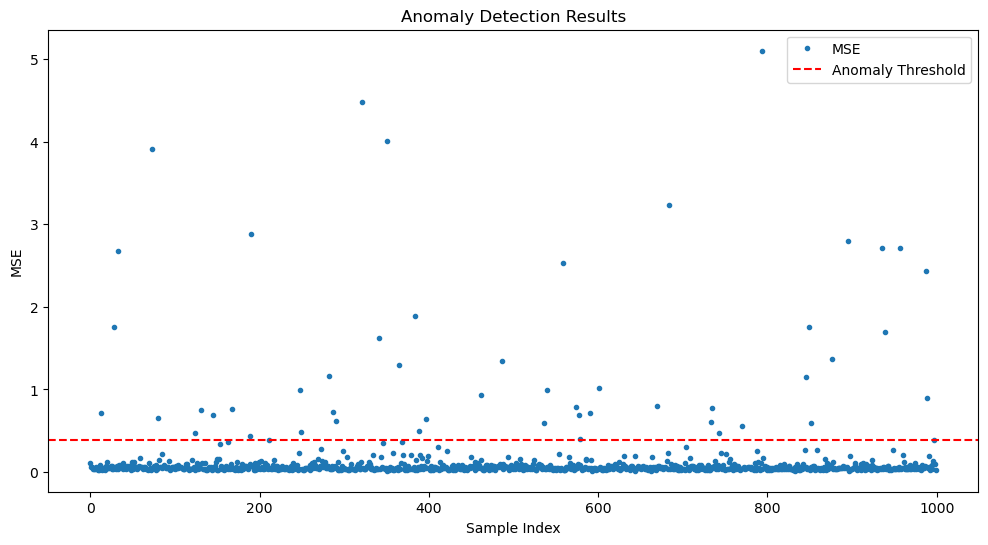

In [14]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

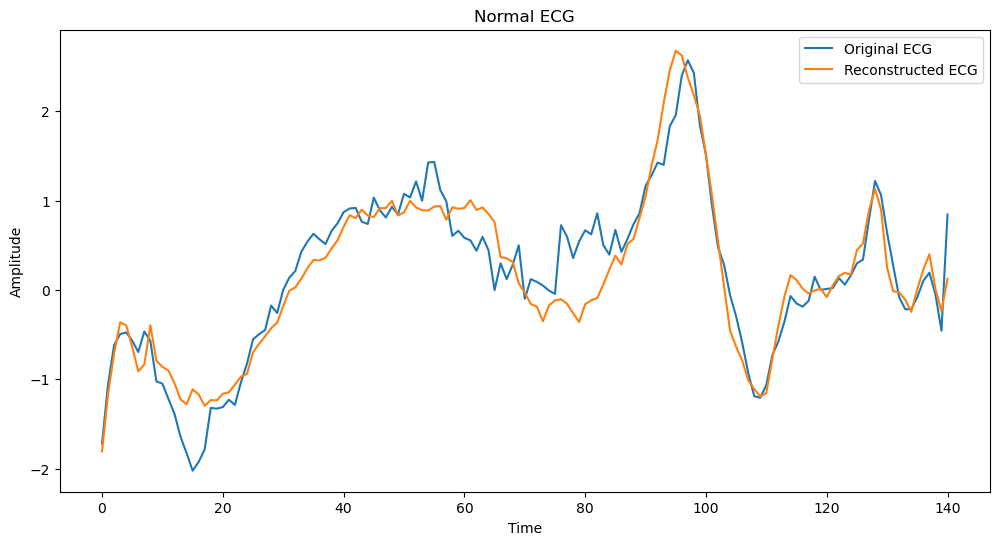

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [16]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nClassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

